In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def extract_keypoints_and_descriptors(images):

    sift = cv2.SIFT_create()

    keypoints_list = []
    descriptors_list = []

    for image in images:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(image_gray, None)
        keypoints_list.append(kp)
        descriptors_list.append(des)

    return keypoints_list, descriptors_list

In [ ]:
def match_images(train_descriptors_list, test_descriptors, threshold=0.9):
    # Initialize BFMatcher:This matcher compares each descriptor from one set to
    # all descriptors in another set and finds the best matches.
    bf = cv2.BFMatcher()
    good_matches_list = []

    # Loop through each set of descriptors in train_descriptors_list
    for train_descriptors in train_descriptors_list:
        # Match descriptors
        matches = bf.knnMatch(train_descriptors, test_descriptors, k=2)
        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < threshold * n.distance:
                good_matches.append(m)


        good_matches_list.append(good_matches)

    return good_matches_list

In [ ]:

def read_images_from_directory(directory):
    # Initialize list to store images and corresponding filenames
    images = []
    filenames = []

    # Get list of files in the directory
    files = os.listdir(directory)

    # Filter out only image files
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff', '.bmp'))]

    # Read each image file
    for file in image_files:
        # Construct full path to the image file
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path, cv2.IMREAD_COLOR)
        # Append the image to the list along with its filename
        if image is not None:
            images.append(image)
            filenames.append(file)

    return images, filenames

In [ ]:
def get_user_from_filename(filename):
    # Extract user ID from filename, assuming the format "00006" for user 6, etc.
    user_id = filename.split('.')[0]  # Adjust according to your filename format
    return user_id

In [ ]:
def display_matches(train_image, train_keypoints, test_image, test_keypoints, matches, title):
    # Draw matches for the current test image
    img_matches = cv2.drawMatches(train_image, train_keypoints, test_image, test_keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
def calculate_distance(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the images
    diff = cv2.absdiff(gray1, gray2)

    # Compute the sum of absolute differences (SAD)
    sad = np.sum(diff)

    return sad

00009,,,,,,00009.bmp
Match Results for Train Image 00009_52.bmp and Test Image 00009.bmp:
False Match Rate (FMR): 34.75
False Non-Match Rate (FNMR): 84.5
Best Match for Test Image 00009.bmp: Train Image 00009_52.bmp with FMR: 34.75


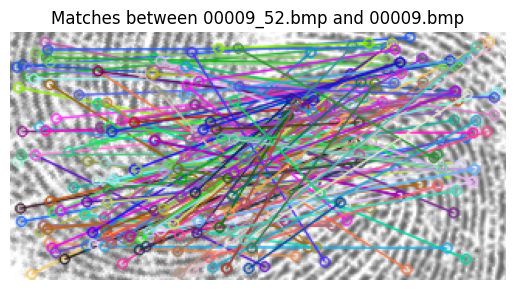

00008,,,,,,00008.bmp
Match Results for Train Image 00008_27.bmp and Test Image 00008.bmp:
False Match Rate (FMR): 27.5
False Non-Match Rate (FNMR): 78.75
Match Results for Train Image 00008_35.bmp and Test Image 00008.bmp:
False Match Rate (FMR): 25.5
False Non-Match Rate (FNMR): 92.91666666666667
Best Match for Test Image 00008.bmp: Train Image 00008_35.bmp with FMR: 25.5


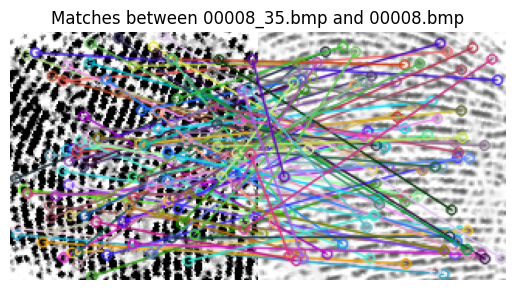

00006,,,,,,00006.bmp
Match Results for Train Image 00006_14.bmp and Test Image 00006.bmp:
False Match Rate (FMR): 40.0
False Non-Match Rate (FNMR): 75.58333333333333
Match Results for Train Image 00006_18.bmp and Test Image 00006.bmp:
False Match Rate (FMR): 39.0
False Non-Match Rate (FNMR): 77.25
Match Results for Train Image 00006_22.bmp and Test Image 00006.bmp:
False Match Rate (FMR): 37.5
False Non-Match Rate (FNMR): 55.583333333333336
Best Match for Test Image 00006.bmp: Train Image 00006_22.bmp with FMR: 37.5


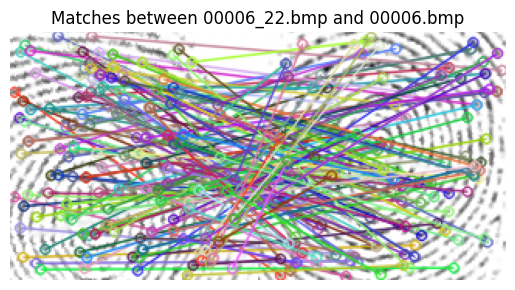

00007,,,,,,00007.bmp
Match Results for Train Image 00007_33.bmp and Test Image 00007.bmp:
False Match Rate (FMR): 31.5
False Non-Match Rate (FNMR): 63.583333333333336
Match Results for Train Image 00007_27.bmp and Test Image 00007.bmp:
False Match Rate (FMR): 28.0
False Non-Match Rate (FNMR): 74.83333333333333
Best Match for Test Image 00007.bmp: Train Image 00007_27.bmp with FMR: 28.0


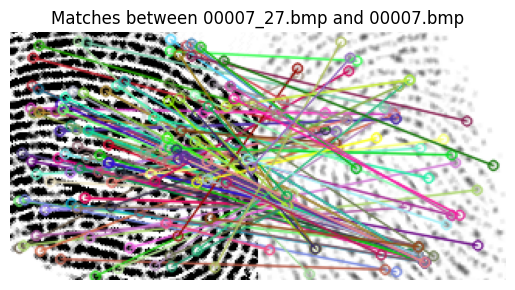

In [ ]:
directory_mapping = {
    "00006": "/content/train/6/",
    "00007": "/content/train/7/",
    "00008": "/content/train/8/",
    "00009": "/content/train/9/"
}

directory_test = "/content/real"

test_images, test_filenames = read_images_from_directory(directory_test)

for i, test_image in enumerate(test_images):
    user_id = get_user_from_filename(test_filenames[i])
    print(f"{user_id},,,,,,{test_filenames[i]}")

    if user_id in directory_mapping:
        train_user_directory = directory_mapping[user_id]

        if os.path.exists(train_user_directory):
            train_images, train_filenames = read_images_from_directory(train_user_directory)

            train_keypoints, train_descriptors = extract_keypoints_and_descriptors(train_images)

            sift = cv2.SIFT_create()
            test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
            test_keypoints, test_descriptors = sift.detectAndCompute(test_image_gray, None)

            best_fmr = float('inf')
            best_matching_train_filename = ""

            matches_list = match_images(train_descriptors, test_descriptors)

            for j, matches in  enumerate(matches_list):
                num_matches = len(matches)
                num_non_matches = len(train_keypoints[j]) - num_matches

                #ratio of the number of matches to the total number of keypoints in the training image.
                fmr = num_matches /4
                # ratio of the number of non-matches to the total number of keypoints in the training image.
                fnmr = num_non_matches / 12

                if fmr < best_fmr:
                    best_fmr = fmr
                    best_matching_train_filename = train_filenames[j]

                    print(f"Match Results for Train Image {train_filenames[j]} and Test Image {test_filenames[i]}:")
                    print("False Match Rate (FMR):", fmr)
                    print("False Non-Match Rate (FNMR):", fnmr)

            if best_matching_train_filename:
                print(f"Best Match for Test Image {test_filenames[i]}: Train Image {best_matching_train_filename} with FMR: {best_fmr}")

                display_matches(train_images[train_filenames.index(best_matching_train_filename)], train_keypoints[train_filenames.index(best_matching_train_filename)], test_image, test_keypoints, matches_list[train_filenames.index(best_matching_train_filename)], f'Matches between {best_matching_train_filename} and {test_filenames[i]}')
        else:
            print(f"Training directory does not exist for user {user_id}")
    else:
        print(f"No training data found for user {user_id} corresponding to test image {test_filenames[i]}")




EER Threshold: 0.9600000000000001, EER: 0.0730099816500328


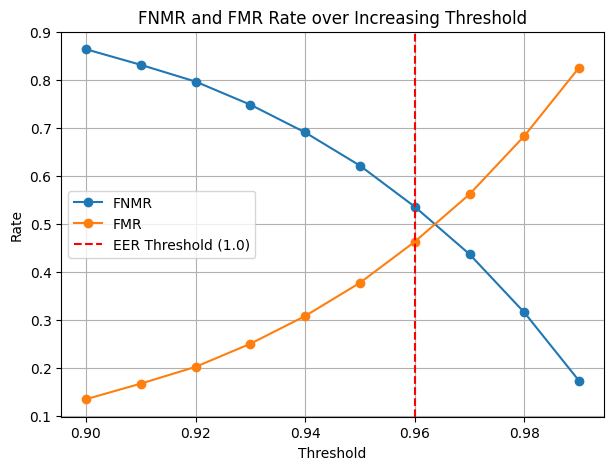

In [ ]:
thresholds = np.arange(0.9, 1.0, 0.01)
fmr_values = []
fnmr_values = []

for threshold in thresholds:
    fmr_sum = 0
    fnmr_sum = 0
    count = 0

    for i, test_image in enumerate(test_images):
        user_id = get_user_from_filename(test_filenames[i])
        if user_id in directory_mapping:
            train_user_directory = directory_mapping[user_id]

            if os.path.exists(train_user_directory):
                train_images, train_filenames = read_images_from_directory(train_user_directory)

                train_keypoints, train_descriptors = extract_keypoints_and_descriptors(train_images)

                sift = cv2.SIFT_create()
                test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
                test_keypoints, test_descriptors = sift.detectAndCompute(test_image_gray, None)

                matches_list = match_images(train_descriptors, test_descriptors, threshold)

                for j, matches in enumerate(matches_list):
                    num_matches = len(matches)
                    num_non_matches = len(train_keypoints[j]) - num_matches

                    fmr = num_matches /len(train_keypoints[j])
                    fnmr = num_non_matches / len(train_keypoints[j])

                    fmr_sum += fmr
                    fnmr_sum += fnmr
                    count += 1

    # Calculate average FMR and FNMR for current threshold
    fmr_values.append(fmr_sum / count)
    fnmr_values.append(fnmr_sum / count)

# Identify EER (Equal Error Rate)
eer_threshold = None
eer = float('inf')
for fmr, fnmr in zip(fmr_values, fnmr_values):
    if abs(fmr - fnmr) < eer:
        eer = abs(fmr - fnmr)
        eer_threshold = thresholds[fmr_values.index(fmr)]

print(f"EER Threshold: {eer_threshold}, EER: {eer}")

plt.figure(figsize=(7, 5))
plt.plot(thresholds, fnmr_values, marker='o', label='FNMR')
plt.plot(thresholds, fmr_values, marker='o', label='FMR')
plt.axvline(x=eer_threshold, color='r', linestyle='--', label=f'EER Threshold ({eer_threshold:.1f})')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FNMR and FMR Rate over Increasing Threshold')
plt.legend()
plt.grid(True)
plt.show()


* fmr  :higher threshold makes it more stringent for a match to occur
* fnmr: higher threshold makes it more difficult for a genuine match

The threshold should be chosen such that it balances the trade-off between FMR and FNMR. It's possible that the threshold values chosen in your code do not reflect this balance, leading to unexpected